# 1.0 Initial Data Exploration

In [51]:
RANDOM_SEED = 42

## Downloading and Extracting the Dataset

In [52]:
from urllib.request import urlretrieve
import zipfile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
filepath = '../data/raw/ml-100k.zip'
extractpath = '../data/raw/'


def download_data():
    urlretrieve(url, filepath)
    with zipfile.ZipFile(filepath, 'r') as zip_ref:
        zip_ref.extractall(extractpath)

In [53]:
download_data()

## Loading the Dataset

In [54]:
import pandas as pd

# Load the u.data file into a dataframe
ratings_df = pd.read_csv('../data/raw/ml-100k/u.data', sep='\t', header=None,
                         names=['user_id', 'item_id', 'rating', 'timestamp'])

# Load the u.item file into a dataframe
movies_df = pd.read_csv('../data/raw/ml-100k/u.item', sep='|', header=None,
                        encoding='latin-1',
                        names=['item_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action',
                               'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
                               'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war',
                               'western'], index_col='item_id')

# Load the u.user file into a dataframe
users_df = pd.read_csv('../data/raw/ml-100k/u.user', sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'], index_col='user_id')

# Load the u.genre file into a dataframe
genres_df = pd.read_csv('../data/raw/ml-100k/u.genre', sep='|', header=None, names=['genre', 'genre_id'], index_col='genre_id')

# Load the u.occupation file into a dataframe
occupations_df = pd.read_csv('../data/raw/ml-100k/u.occupation', sep='|', header=None, names=['occupation'])

# Load the u.info file into a dataframe
info_df = pd.read_csv('../data/raw/ml-100k/u.info', sep=' ', header=None, names=['count', 'info'], index_col='info')

Based on all those datasets, we will build our own dataset, which will be used for the recommender system.

## Data Exploration

In [55]:
df_dict = {
    'Ratings Dataframe': ratings_df,
    'Movies Dataframe': movies_df,
    'Users Dataframe': users_df,
    'Genres Dataframe': genres_df,
    'Occupations Dataframe': occupations_df,
    'Info Dataframe': info_df
}

In [56]:
for df_name, df in df_dict.items():
    print(f'{df_name} shape: {df.shape}')

Ratings Dataframe shape: (100000, 4)
Movies Dataframe shape: (1682, 23)
Users Dataframe shape: (943, 4)
Genres Dataframe shape: (19, 1)
Occupations Dataframe shape: (21, 1)
Info Dataframe shape: (3, 1)


## 1) Exploring the Users Dataframe

In [57]:
users_df.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [58]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


#### 1.1) Age Distribution

In [59]:
users_df['age'].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

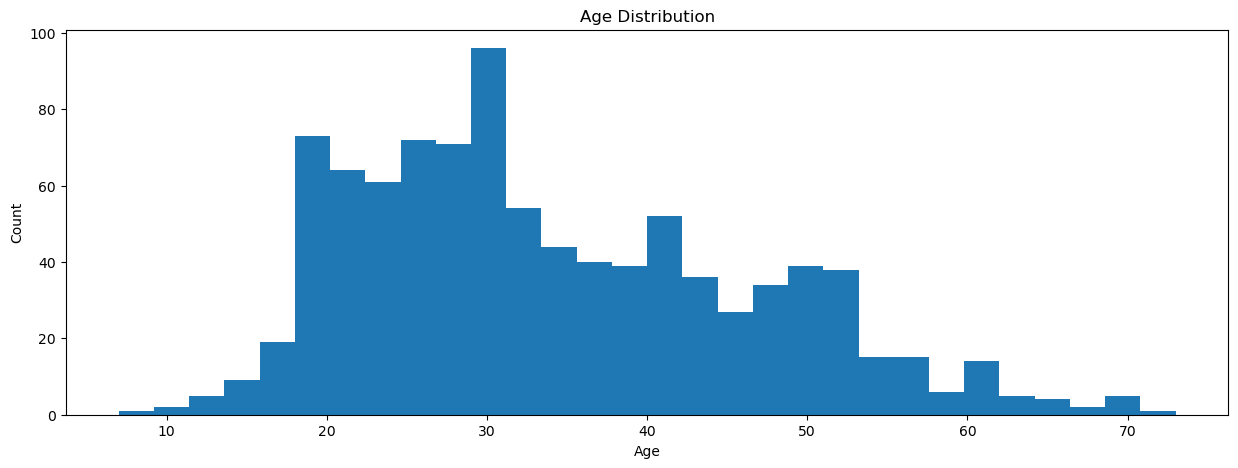

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.hist(users_df['age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 1.2) Gender Statistics

In [61]:
users_df['gender'].value_counts()

gender
M    670
F    273
Name: count, dtype: int64

### 1.3) Occupation Statistics

In [62]:
users_df['occupation'].value_counts()

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64

### 1.4) Zip Code Statistics

In [13]:
print("Number of distinct zip codes:", users_df['zip_code'].nunique())

Number of distinct zip codes: 795


In [49]:
users_df['zip_code'].describe()

count       943
unique      795
top       55414
freq          9
Name: zip_code, dtype: object

In [14]:
users_df['zip_code'].value_counts()

zip_code
55414    9
55105    6
55337    5
10003    5
20009    5
        ..
24060    1
55413    1
19149    1
02176    1
77841    1
Name: count, Length: 795, dtype: int64

## 2. Exploring the Movies Dataframe

In [15]:
movies_df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
item_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 1 to 1682
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1682 non-null   object 
 1   release_date        1681 non-null   object 
 2   video_release_date  0 non-null      float64
 3   imdb_url            1679 non-null   object 
 4   unknown             1682 non-null   int64  
 5   action              1682 non-null   int64  
 6   adventure           1682 non-null   int64  
 7   animation           1682 non-null   int64  
 8   childrens           1682 non-null   int64  
 9   comedy              1682 non-null   int64  
 10  crime               1682 non-null   int64  
 11  documentary         1682 non-null   int64  
 12  drama               1682 non-null   int64  
 13  fantasy             1682 non-null   int64  
 14  film_noir           1682 non-null   int64  
 15  horror              1682 non-null   int64  
 16  musical    

### 2.1) Handling Missing Values

Let's remove columns containing null values: **video_release_data** and **imdb_url**. They are not useful for our recommender system.

In [17]:
movies_df.drop(['video_release_date', 'imdb_url'], axis=1, inplace=True)

In [18]:
movies_df.isnull().sum()

title           0
release_date    1
unknown         0
action          0
adventure       0
animation       0
childrens       0
comedy          0
crime           0
documentary     0
drama           0
fantasy         0
film_noir       0
horror          0
musical         0
mystery         0
romance         0
sci_fi          0
thriller        0
war             0
western         0
dtype: int64

In [19]:
movies_df[movies_df['release_date'].isnull()]

,title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
item_id,,,,,,,,,,,,,,,,,,,,,
267,unknown,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print("Ratings with item_id=267:")
ratings_df[ratings_df['item_id'] == 267]

Ratings with item_id=267:


,user_id,item_id,rating,timestamp
2172,130,267,5,875801239
3781,5,267,4,875635064
7245,268,267,3,875742077
12475,297,267,3,875409139
14756,319,267,4,875707690
15292,1,267,4,875692955
49295,532,267,3,875441348
93523,833,267,1,875655669
99723,422,267,4,875655986


This movie we will also remove from everywhere. **item_id = 267**. In the Ratings Dataframe, there are only 9 ratings for this movie.

In [21]:
movies_df.drop(267, axis=0, inplace=True)

In [22]:
movies_df[movies_df['unknown'] == 1]

,title,release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
item_id,,,,,,,,,,,,,,,,,,,,,
1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print("Ratings with item_id=1373:")
ratings_df[ratings_df['item_id'] == 1373]

Ratings with item_id=1373:


,user_id,item_id,rating,timestamp
8567,181,1373,1,878962052


The movie with `unknown` genre can badly affect our recommender system. So, removing it :) **item_id = 1373**

It also has only 1 rating.

In [24]:
movies_df.drop(1373, axis=0, inplace=True)

In [25]:
movies_df.drop('unknown', axis=1, inplace=True)

### 2.2) Release Date Statistics

In [26]:
print("Distribution of release dates:")
movies_df['release_date'].value_counts()

Distribution of release dates:


release_date
01-Jan-1995    215
01-Jan-1994    213
01-Jan-1993    126
01-Jan-1997     98
01-Jan-1992     37
              ... 
30-Nov-1996      1
15-Mar-1996      1
05-Oct-1996      1
18-Dec-1995      1
30-Apr-1997      1
Name: count, Length: 239, dtype: int64

It's interesting to note that most of the releases were on 1'st January. Maybe it's a default date for movies with unknown release date.

In [27]:
print("Distribution of release years:")
movies_df['release_date'].apply(lambda date: date.split('-')[-1]).value_counts()

Distribution of release years:


release_date
1996    355
1997    286
1995    219
1994    214
1993    126
       ... 
1930      1
1931      1
1922      1
1932      1
1926      1
Name: count, Length: 71, dtype: int64

In [28]:
print("Distribution of release dates without year:")
movies_df['release_date'].apply(lambda date: '-'.join(date.split('-')[:-1])).value_counts()

Distribution of release dates without year:


release_date
01-Jan    1097
08-Mar      12
10-May      11
29-Mar      10
02-May      10
          ... 
26-Oct       1
29-Jun       1
31-Dec       1
23-Apr       1
30-Apr       1
Name: count, Length: 149, dtype: int64

Here, we see that most of the movies were released(if we trust the data) on **1'st January**. Consequently, the **day-month** part of the date is not important for us. We will remove it and leave only **year**.

In [29]:
movies_df['release_year'] = movies_df['release_date'].apply(lambda date: date.split('-')[-1])
movies_df.drop('release_date', axis=1, inplace=True)

### 2.3) Genre Statistics

In [30]:
# Count the number of movies in each genre

genre_count = movies_df.iloc[:, 1:-1].sum(axis=0)

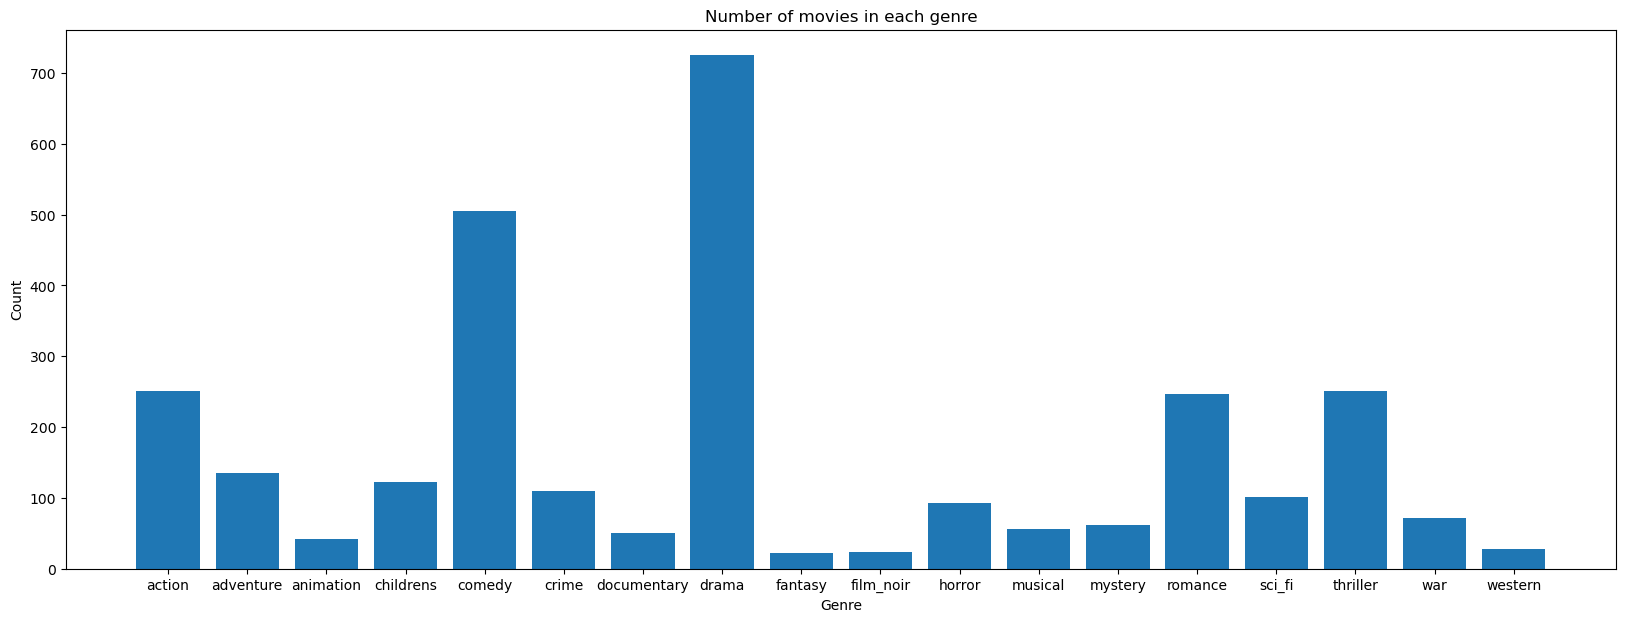

In [31]:
plt.figure(figsize=(20, 7))
plt.bar(genre_count.index, genre_count.values)
plt.title('Number of movies in each genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Also removing the **unknown** genre from the dataframe.

In [32]:
genres_df.drop(0, axis=0, inplace=True)

## 3. Exploring the Ratings Dataframe

In [33]:
ratings_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [34]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


### 3.1) Removing films which we removed from the Movies Dataframe

In [35]:
ratings_df = ratings_df[ratings_df['item_id'] != 267]
ratings_df = ratings_df[ratings_df['item_id'] != 1373]

In [36]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99990 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    99990 non-null  int64
 1   item_id    99990 non-null  int64
 2   rating     99990 non-null  int64
 3   timestamp  99990 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB


Checking that we still have the same amount of users:

In [37]:
ratings_df['user_id'].nunique()

943

### 3.2) Rating Statistics

In [38]:
ratings_df['rating'].describe()

count    99990.000000
mean         3.529893
std          1.125656
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

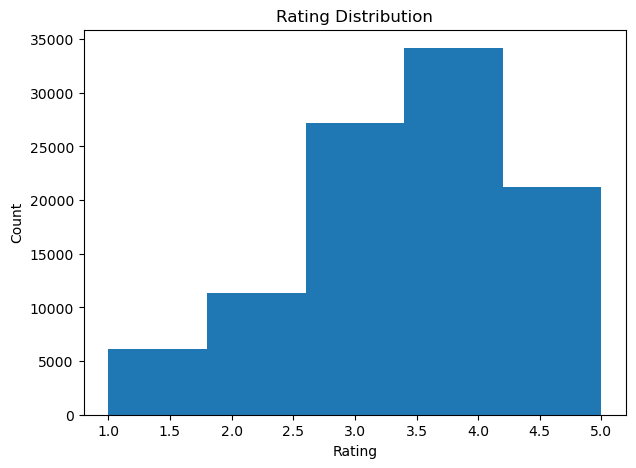

In [39]:
plt.figure(figsize=(7, 5))
plt.hist(ratings_df['rating'], bins=5)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [40]:
print("Average number of ratings per user:", ratings_df.groupby('user_id')['rating'].count().mean())

Average number of ratings per user: 106.033934252386


## Saving the Cleaned Versions of Dataframes

In [41]:
ratings_df.to_csv('../data/interim/ratings.csv', index=False)

In [42]:
movies_df.to_csv('../data/interim/movies.csv')

In [43]:
users_df.to_csv('../data/interim/users.csv')

In [44]:
genres_df.to_csv('../data/interim/genres.csv')

In [45]:
occupations_df.to_csv('../data/interim/occupations.csv', index=False)

In [46]:
info_df.to_csv('../data/interim/info.csv', index=False)